In [1]:
import xarray as xr
import gcsfs
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import intake

/srv/conda/envs/notebook/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
cat = intake.Catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds_faces1 = cat["ECCOv4r3"].to_dask()
ds_faces2 = xr.open_zarr(gcsfs.GCSMap('pangeo-data/ECCO_layers.zarr'))
ds_faces=xr.merge((ds_faces1,ds_faces2))

In [3]:
ds_ll = faces_dataset_to_latlon(ds_faces, metric_vector_pairs=[('LaHw3RHO','LaHs3RHO')])#.compute()
ds = (ds_ll.reset_coords(drop=True).roll(i=180, roll_coords=False).roll(i_g=180, roll_coords=False))
coords = (ds_ll.coords.to_dataset().reset_coords().roll(i=180, roll_coords=False).roll(i_g=180, roll_coords=False))

In [1]:
#Original Mask
def og(newMask):
    newMask[215:, 0:150] = 0
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 250:] = 0
    newMask[:185, :145] = 0
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

In [2]:
def new(newMask):
    #mask[ydimension, xdimnesion]
    newMask[215:, 0:147] = 0 #fixes top left pixel
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 260:] = 0 #right 
    newMask[185:199, 250:] = 0 #right
    newMask[:185, :133] = 0 #responsible for bottom left pixel
    newMask[:180, :141] = 0 #fixse bottom left pixeel 
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    newMask[50:120, 100:154] = 0
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

In [3]:
def newer(newMask):
    #mask[ydimension, xdimnesion]
    newMask[215:, 0:147] = 0 #fixes top left pixel
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 260:] = 0 #right 
    newMask[185:199, 250:] = 0 #right
    newMask[135:155, 135:155] = 0 
    newMask[185:189, 115:131] = 0 ###########################################
    newMask[:185, :133] = 0 #responsible for bottom left pixel
    newMask[:180, :141] = 0 #fixse bottom left pixeel 
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    newMask[50:120, 100:154] = 0
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

In [4]:
def new2(newMask):
        #mask[ydimension, xdimnesion]
    newMask[215:, 0:147] = 0 #fixes top left pixel
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 260:] = 0 #right 
    newMask[185:199, 250:] = 0 #right
    newMask[135:155, 135:155] = 0 
    newMask[185:189, 115:131] = 0 
    newMask[:185, :133] = 0 #responsible for bottom left pixel
    newMask[:179, :141] = 0 #fixse bottom left pixeel 
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    newMask[50:120, 100:154] = 0
    ###
    #newMask[178:180, 137:143] 
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

In [6]:
#old = og(coords.hFacS.isel(k=0).load())
#new = new(coords.hFacS.isel(k=0).load())
#newer = newer(coords.hFacS.isel(k=0).load())
new2 = new2(coords.hFacS.isel(k=0).load())

In [19]:
#Time-averaged velocity over the entire atlantic 
ds_v_old = ds.LaVH3RHO * old * coords.dxG
v1 = ds_v_old.mean('time').sum('i') 

In [20]:
#Time-averaged velocity over the entire atlantic 
ds_v_new = ds.LaVH3RHO * new * coords.dxG
v2 = ds_v_new.mean('time').sum('i') 

In [21]:
#Time-averaged velocity over the entire atlantic 
ds_v_newer = ds.LaVH3RHO * newer * coords.dxG
v3 = ds_v_newer.mean('time').sum('i') 

In [9]:
#Time-averaged velocity over the entire atlantic 
ds_v_new2 = ds.LaVH3RHO * new2 * coords.dxG
v7 = ds_v_new2.mean('time').sum('i') 

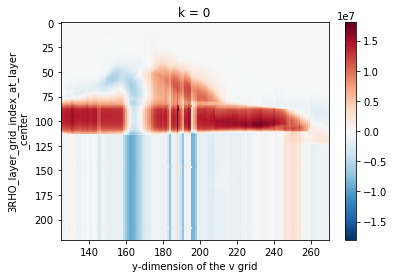

In [26]:
v1[:, 125:].cumsum('l3_c').plot()
plt.gca().invert_yaxis()

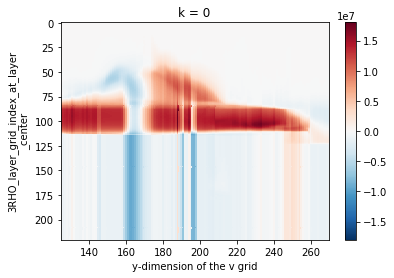

In [27]:
v2[:, 125:].cumsum('l3_c').plot()
plt.gca().invert_yaxis()

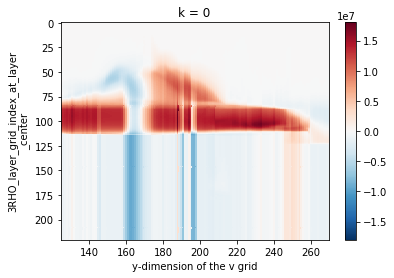

In [11]:
v3[:, 125:].cumsum('l3_c').plot()
plt.gca().invert_yaxis()

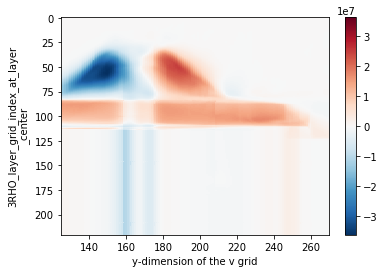

In [9]:
v4[:, 125:].cumsum('l3_c').plot()
plt.gca().invert_yaxis()

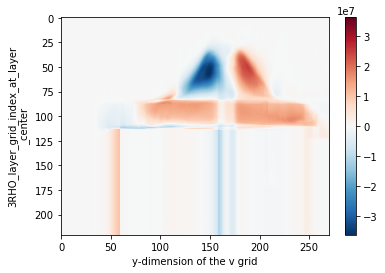

In [10]:
v4.cumsum('l3_c').plot()
plt.gca().invert_yaxis()

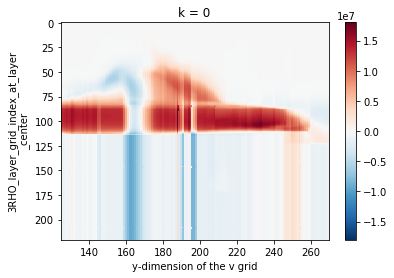

In [10]:
v7[:, 125:].cumsum('l3_c').plot()
plt.gca().invert_yaxis()